In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage


# df = pd.read_csv('final.csv')
# x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
# y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

# data = list(zip(x, y))

# hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
# labels = hierarchical_cluster.fit_predict(data)

# plt.scatter(x, y, c=labels)
# plt.show()

In [5]:
df = pd.read_csv('final.csv')
df.head()

,Unnamed: 0,CustomerID,no_bills,sum_bill,no_item,Recency,Recency_min,no_item_per_bill,Average_bill,summ_bill_log,Average_bill_log,Recency_int,month_interval,no_of_visit_per_month,Country
0,0,12346.0,1,77183.60,1,2011-01-18 10:01:00,2011-01-18 10:01:00,1.00,77183.600000,11.253942,11.253942,1.0,0.000000,0.000000,United Kingdom
1,1,12347.0,7,4310.00,182,2011-12-07 15:52:00,2010-12-07 14:57:00,26.00,615.714286,8.368693,6.422783,12.0,12.166667,1.738095,Iceland
2,2,12348.0,4,1437.24,27,2011-09-25 13:13:00,2010-12-16 19:09:00,6.75,359.310000,7.270480,5.884186,9.0,9.400000,2.350000,Finland
3,3,12349.0,1,1457.55,72,2011-11-21 09:51:00,2011-11-21 09:51:00,72.00,1457.550000,7.284512,7.284512,11.0,0.000000,0.000000,Italy
4,4,12350.0,1,294.40,16,2011-02-02 16:01:00,2011-02-02 16:01:00,16.00,294.400000,5.684939,5.684939,2.0,0.000000,0.000000,Norway


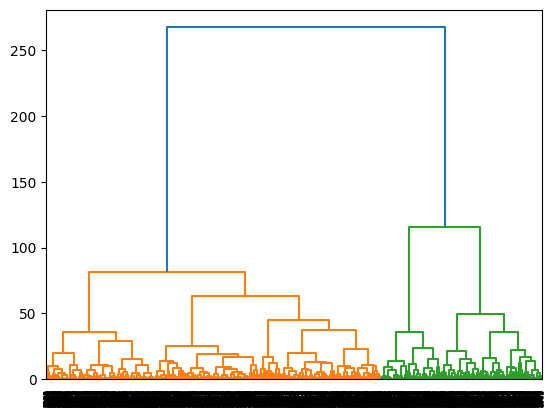

In [6]:
data= df[['summ_bill_log','Average_bill_log','Recency_int','no_of_visit_per_month']]
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

In [30]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)


In [31]:
len(df),len(labels)

(4258, 4258)

In [32]:
df['label']=labels

In [33]:
df['label'].value_counts()

1    938
4    895
0    859
3    525
2    513
5    338
6    190
Name: label, dtype: int64

In [34]:
df

,Unnamed: 0,CustomerID,no_bills,sum_bill,no_item,Recency,Recency_min,no_item_per_bill,Average_bill,summ_bill_log,Average_bill_log,Recency_int,month_interval,no_of_visit_per_month,Country,label
0,0,12346.0,1,77183.60,1,2011-01-18 10:01:00,2011-01-18 10:01:00,1.000000,77183.600000,11.253942,11.253942,1.0,0.000000,0.000000,United Kingdom,3
1,1,12347.0,7,4310.00,182,2011-12-07 15:52:00,2010-12-07 14:57:00,26.000000,615.714286,8.368693,6.422783,12.0,12.166667,1.738095,Iceland,4
2,2,12348.0,4,1437.24,27,2011-09-25 13:13:00,2010-12-16 19:09:00,6.750000,359.310000,7.270480,5.884186,9.0,9.400000,2.350000,Finland,0
3,3,12349.0,1,1457.55,72,2011-11-21 09:51:00,2011-11-21 09:51:00,72.000000,1457.550000,7.284512,7.284512,11.0,0.000000,0.000000,Italy,4
4,4,12350.0,1,294.40,16,2011-02-02 16:01:00,2011-02-02 16:01:00,16.000000,294.400000,5.684939,5.684939,2.0,0.000000,0.000000,Norway,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4253,4253,18280.0,1,180.60,10,2011-03-07 09:52:00,2011-03-07 09:52:00,10.000000,180.600000,5.196285,5.196285,3.0,0.000000,0.000000,United Kingdom,2
4254,4254,18281.0,1,80.82,7,2011-06-12 10:53:00,2011-06-12 10:53:00,7.000000,80.820000,4.392224,4.392224,6.0,0.000000,0.000000,United Kingdom,3
4255,4255,18282.0,2,178.05,12,2011-12-02 11:43:00,2011-08-05 13:35:00,6.000000,89.025000,5.182064,4.488917,12.0,3.933333,1.966667,United Kingdom,0
4256,4256,18283.0,16,2088.93,754,2011-12-06 12:02:00,2011-01-06 14:14:00,47.125000,130.558125,7.644407,4.871819,12.0,11.100000,0.693750,United Kingdom,4
